<a href="https://colab.research.google.com/github/Sudipthamudiraj/OBSIP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mathematical operations-linear Algebra
import numpy as np

# dataframe
import pandas as pd

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score
# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore')
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns

# NLTK
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('omw-1.4')
# Word2vec
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# Utility
import string
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import random
import datetime

# WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [8]:
df = pd.read_csv("/content/Twitter_Data.csv")

In [9]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [10]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39919 entries, 0 to 39918
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  39918 non-null  object 
 1   category    39918 non-null  float64
dtypes: float64(1), object(1)
memory usage: 623.9+ KB


In [11]:
# Check for missing values
df.isnull().sum()

clean_text    1
category      1
dtype: int64

In [12]:
# Fill missing values in the 'clean_text' column with empty strings
df['clean_text'].fillna('', inplace=True)

In [13]:
# Drop rows with missing values in the 'category' column
df.dropna(subset=['category'], inplace=True)

In [14]:
# Confirming the changes
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)

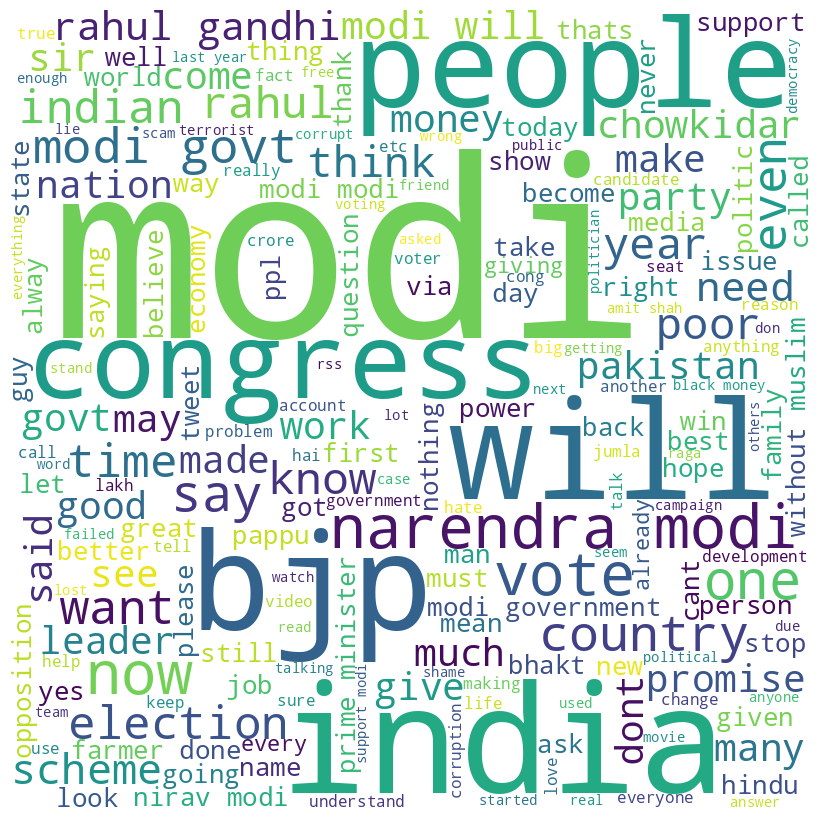

In [17]:
# Convert all tweets to a single string
all_tweets = ' '.join(df['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(all_tweets)

# Plot WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [18]:
# Tokenize words
tokenized_text = [word_tokenize(text.lower()) for text in df['clean_text']]

# Word2Vec model
model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Most similar words
similar_words = model.wv.most_similar('happy', topn=5)
print(similar_words)

[('patriots', 0.9234655499458313), ('satisfied', 0.912860631942749), ('youre', 0.9036774039268494), ('feel', 0.9003123641014099), ('fools', 0.8868793249130249)]


In [19]:
# Define input and target variables
X = df['clean_text']
y = df['category']

In [20]:
# Encode target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = utils.to_categorical(y)

In [21]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [22]:
# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [23]:
# Max sequence length
max_seq_length = max([len(seq) for seq in sequences])

In [24]:
# Pad sequences
X_pad = pad_sequences(sequences, maxlen=max_seq_length)

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [26]:
# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_shape=(max_seq_length,)))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

In [27]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 49, 100)           4745100   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 4862735 (18.55 MB)
Trainable params: 4862735 (18.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [30]:
# Train model
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1, callbacks=[reduce_lr, early_stop])

Epoch 1/5
225/225 [==============================] - 114s 490ms/step - loss: 0.6886 - accuracy: 0.6935 - val_loss: 0.4078 - val_accuracy: 0.8657 - lr: 0.0010
Epoch 2/5
225/225 [==============================] - 106s 471ms/step - loss: 0.1972 - accuracy: 0.9377 - val_loss: 0.2988 - val_accuracy: 0.9089 - lr: 0.0010
Epoch 3/5
225/225 [==============================] - 104s 463ms/step - loss: 0.1005 - accuracy: 0.9707 - val_loss: 0.3383 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 4/5
225/225 [==============================] - 104s 461ms/step - loss: 0.0669 - accuracy: 0.9809 - val_loss: 0.3269 - val_accuracy: 0.9105 - lr: 0.0010
Epoch 5/5
225/225 [==============================] - 103s 460ms/step - loss: 0.0505 - accuracy: 0.9862 - val_loss: 0.3772 - val_accuracy: 0.9086 - lr: 0.0010


In [31]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

250/250 [==============================] - 5s 20ms/step - loss: 0.2742 - accuracy: 0.9151
Test Loss: 0.27420035004615784
Test Accuracy: 91.51%


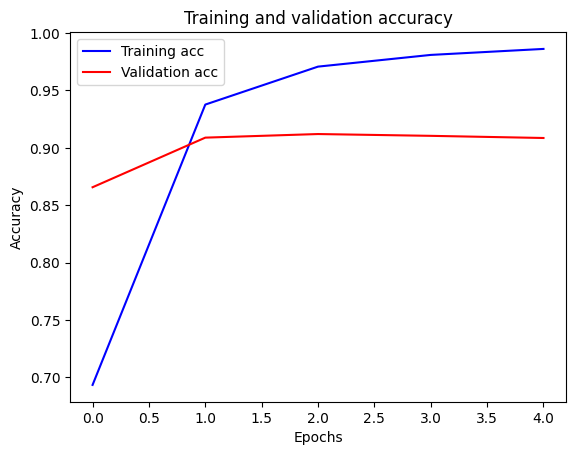

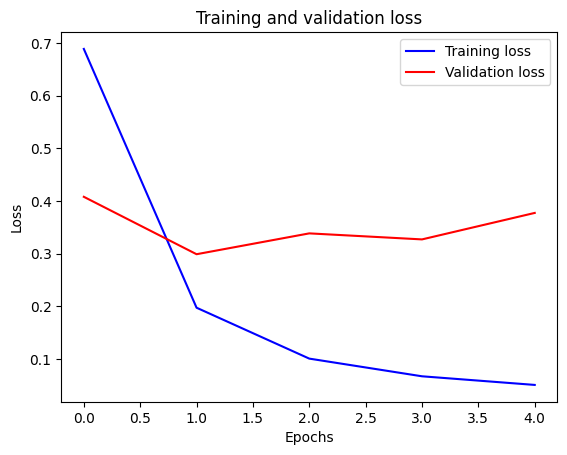

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to original labels
true_labels = np.argmax(y_test, axis=1)

# Print some examples of predicted and true labels
print("Examples of Predictions vs True Labels:")
for i in range(5):
    print("Predicted:", predicted_labels[i], "True:", true_labels[i])

250/250 [==============================] - 7s 28ms/step
Examples of Predictions vs True Labels:
Predicted: 2 True: 2
Predicted: 1 True: 1
Predicted: 1 True: 1
Predicted: 0 True: 0
Predicted: 0 True: 0


In [34]:
# Define a function to classify sentiment
def classify_sentiment(text):
    # Preprocess the text (tokenization, padding, etc.)
    text_sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(text_sequence, maxlen=max_seq_length)

    # Make prediction using the trained model
    prediction = model.predict(padded_sequence)

    # Convert prediction to class label
    predicted_label = np.argmax(prediction)

    # Map class label to sentiment
    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    sentiment = sentiment_mapping[predicted_label]

    return sentiment

# Test the function with somesentences
sentences = [
    "I love this movie, it's amazing!",
    "The weather today is beautiful.",
    "I feel happy when I'm with my friends.",
    "The food at this restaurant is delicious.",
    "I'm excited about the new project at work.",
    "I'm not sure if I like the new design.",
    "I'm feeling a bit down today.",
    "This book is boring, I couldn't finish it.",
    "The customer service was terrible, I won't go back.",
    "I'm so angry right now!",
    "I'm indifferent about the outcome of the game.",
    "The traffic was horrible this morning.",
    "I'm grateful for all the help you've given me.",
    "I'm feeling anxious about the presentation tomorrow.",
    "The movie was okay, nothing special.",
]

print("Sentences and Predicted Sentiments:")
for sentence in sentences:
    sentiment = classify_sentiment(sentence)
    print("Sentence:", sentence)
    print("Predicted Sentiment:", sentiment)
    print()

Sentences and Predicted Sentiments:
1/1 [==============================] - 0s 30ms/step
Sentence: I love this movie, it's amazing!
Predicted Sentiment: Positive

1/1 [==============================] - 0s 34ms/step
Sentence: The weather today is beautiful.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 30ms/step
Sentence: I feel happy when I'm with my friends.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 30ms/step
Sentence: The food at this restaurant is delicious.
Predicted Sentiment: Neutral

1/1 [==============================] - 0s 26ms/step
Sentence: I'm excited about the new project at work.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 32ms/step
Sentence: I'm not sure if I like the new design.
Predicted Sentiment: Positive

1/1 [==============================] - 0s 28ms/step
Sentence: I'm feeling a bit down today.
Predicted Sentiment: Negative

1/1 [==============================] - 0s 27ms/step
Sent

250/250 [==============================] - 9s 38ms/step


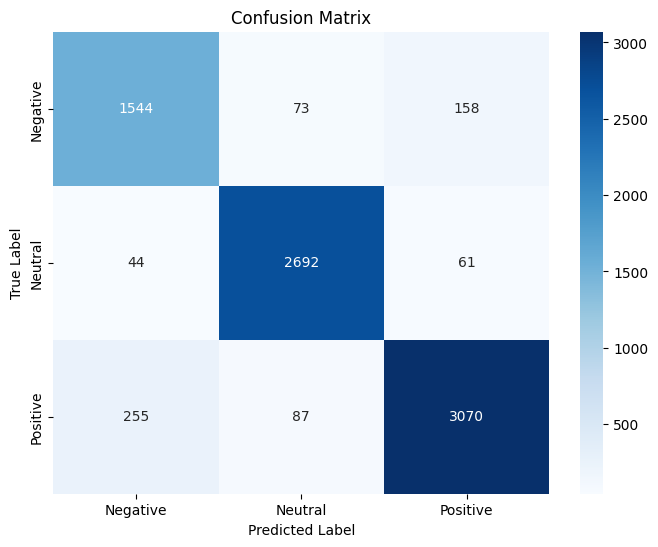

In [35]:
# Make predictions on the entire test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# Classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.87      0.85      1775
     Neutral       0.94      0.96      0.95      2797
    Positive       0.93      0.90      0.92      3412

    accuracy                           0.92      7984
   macro avg       0.91      0.91      0.91      7984
weighted avg       0.92      0.92      0.92      7984

